Recommandations des menus de restaurants en se basant sur rating des users

In [60]:
import pandas as pd                                     #data manipulation and analysis
import matplotlib.pyplot as plt                         #graphs
import numpy as np                                      #mathematical functions,matrics
import matplotlib as mpl
from wordcloud import WordCloud                         #data visualization technique used for representing text data in which the size of each word indicates its frequency or importance
from nltk.corpus import stopwords
# import nltk
# nltk.download('stopwords')
pd.options.mode.chained_assignment = None  # hide SettingWithCopyWarning

In [61]:
df_yelp_businesss=pd.read_csv('yelp_business.csv',encoding="utf8")
df_yelp_businesss[:4]

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping


Pour notre travail, plusieurs champs sont insignifiants . on aura pas besoin du nom du proprietaire du business ni du quartier où se trouve ce dernier ou son adresse exacte,long/lat, qu'il est ouvert ou non!

ON NE GARDE DONC QUE L'ID , LA VILLE , STATE , STARS ET LENOMBRE DE REVIEWS AVEC CATEGORIES

In [62]:
df_yelp_business=df_yelp_businesss[['business_id','city','state','stars','review_count','categories']]
df_yelp_business[:1]

,business_id,city,state,stars,review_count,categories
0,FYWN1wneV18bWNgQjJ2GNg,Ahwatukee,AZ,4.0,22,Dentists;General Dentistry;Health & Medical;Or...


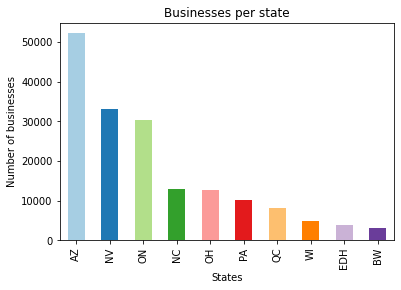

In [63]:
df_yelp_business.state.groupby(df_yelp_business.state).count().sort_values()[::-1][:10].plot(kind="bar",color=plt.cm.Paired(np.arange(12)))
plt.title("Businesses per state")
plt.xlabel("States")
plt.ylabel("Number of businesses")
plt.show()

Le nombre d'entreprise au dela de 10 states n'est plusconsiderables on garde donc juste les states  : arizona - nevada - oregon - North Carolina - Ohio - Pennsylvania - QC - Wisconsin - EDH - BW .

In [64]:
df_only_restaurant=df_yelp_business[df_yelp_business['categories'].str.contains('Restaurants',na=False)]
df_only_restaurant.to_pickle("df_only_restaurant.pkl")

In [65]:
df_yelp_business.shape

(174567, 6)

In [66]:
df_only_restaurant.shape #pour comparaison

(54618, 6)

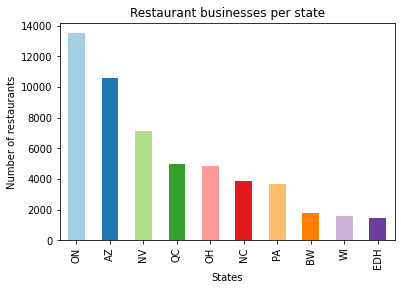

In [67]:
df_only_restaurant.state.groupby(df_only_restaurant.state).count().sort_values()[::-1][:10].plot(kind="bar",color=plt.cm.Paired(np.arange(12)))
plt.title("Restaurant businesses per state")
plt.xlabel("States")
plt.ylabel("Number of restaurants")
plt.show()

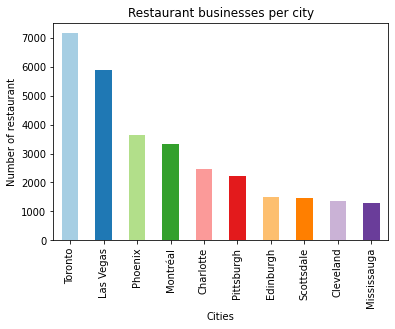

In [68]:
df_only_restaurant.city.groupby(df_only_restaurant.city).count().sort_values()[::-1][:10].plot(kind="bar",color=plt.cm.Paired(np.arange(12)))
plt.title("Restaurant businesses per city")
plt.xlabel("Cities")
plt.ylabel("Number of restaurant")
plt.show()

In [69]:
df_yelp_business = df_yelp_business.dropna(subset=['categories'])
df_yelp_business.shape

(174567, 6)

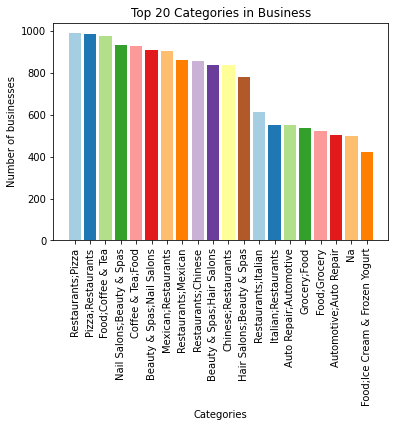

In [70]:
categories={}

for cat_list in df_yelp_business.categories:

    if( (cat_list is None) or (len(cat_list) == 0)):
        continue
    category_list=cat_list.split(",")
    for category in category_list:
        category=category.strip()
        if category not in categories:
            categories[category]=1
        else:
            categories[category]+=1

all_categories=list(categories.keys())

cat_list=[]
for cat in all_categories:
    cat_list.append([cat,categories[cat]])

cat_list=sorted(cat_list, key=lambda x: x[1], reverse=True)
cat_list=cat_list[:20]

plt.bar(range(len(cat_list)),[x[1] for x in cat_list],align="center",
        color=plt.cm.Paired(np.arange(12)))
plt.xticks(range(len(cat_list)), [x[0] for x in cat_list], rotation="vertical")
plt.title("Top 20 Categories in Business")
plt.xlabel("Categories")
plt.ylabel("Number of businesses")
plt.show()

In [71]:
toronto=df_yelp_business[df_yelp_business['city']=='Toronto']
toronto.shape

(17206, 6)

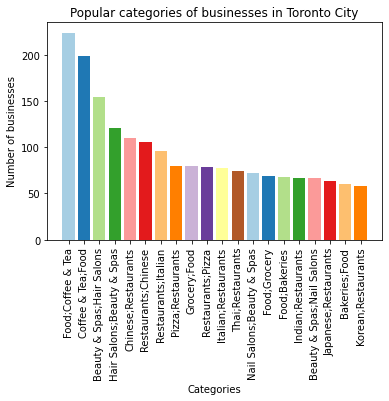

In [72]:
categories={}
for cat_list in toronto.categories:
    if( (cat_list is None) or (len(cat_list) == 0)):
        continue
    category_list=cat_list.split(",")
    for category in category_list:
        category=category.strip()
        if category not in categories:
            categories[category]=1
        else:
            categories[category]+=1

all_categories=list(categories.keys())

cat_list=[]
for cat in all_categories:
    cat_list.append([cat,categories[cat]])
    
cat_list=sorted(cat_list, key=lambda x: x[1], reverse=True)
cat_list=cat_list[:20]

plt.bar(range(len(cat_list)),[x[1] for x in cat_list],align="center", color=plt.cm.Paired(np.arange(12)))
plt.xticks(range(len(cat_list)), [x[0] for x in cat_list], rotation="vertical")
plt.title("Popular categories of businesses in Toronto City")
plt.xlabel("Categories")
plt.ylabel("Number of businesses")
plt.show()

In [73]:
las_vegas=df_yelp_business[df_yelp_business['city']=='Las Vegas']
las_vegas.shape

(26775, 6)

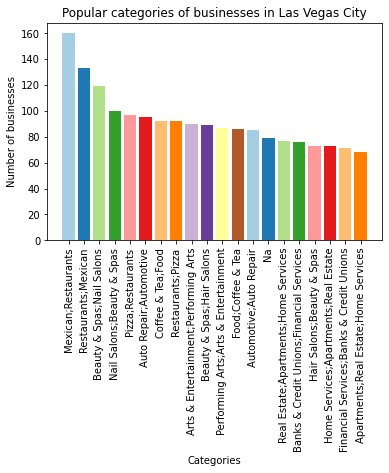

In [74]:
categories={}
for cat_list in las_vegas.categories:
    if( (cat_list is None) or (len(cat_list) == 0)):
        continue
    category_list=cat_list.split(",")
    for category in category_list:
        category=category.strip()
        if category not in categories:
            categories[category]=1
        else:
            categories[category]+=1

all_categories=list(categories.keys())

cat_list=[]
for cat in all_categories:
    cat_list.append([cat,categories[cat]])
    
cat_list=sorted(cat_list, key=lambda x: x[1], reverse=True)
cat_list=cat_list[:20]

plt.bar(range(len(cat_list)),[x[1] for x in cat_list],align="center",color=plt.cm.Paired(np.arange(12)))
plt.xticks(range(len(cat_list)), [x[0] for x in cat_list], rotation="vertical")
plt.title("Popular categories of businesses in Las Vegas City")
plt.xlabel("Categories")
plt.ylabel("Number of businesses")
plt.show()

In [75]:
arizona=df_yelp_business[df_yelp_business['state']=='AZ']
arizona.shape

(52214, 6)

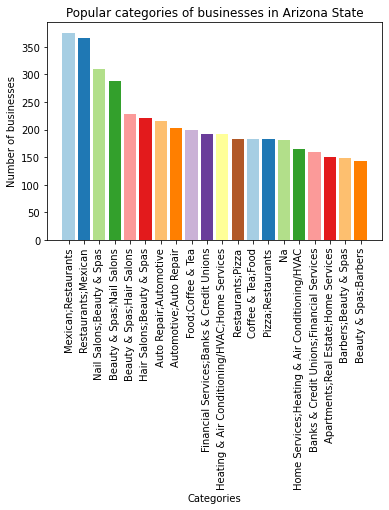

In [76]:
categories={}
for cat_list in arizona.categories:
    if( (cat_list is None) or (len(cat_list) == 0)):
        continue
    category_list=cat_list.split(",")
    for category in category_list:
        category=category.strip()
        if category not in categories:
            categories[category]=1
        else:
            categories[category]+=1

all_categories=list(categories.keys())

cat_list=[]
for cat in all_categories:
    cat_list.append([cat,categories[cat]])
    
cat_list=sorted(cat_list, key=lambda x: x[1], reverse=True)
cat_list=cat_list[:20]

plt.bar(range(len(cat_list)),[x[1] for x in cat_list],align="center", color=plt.cm.Paired(np.arange(12)))
plt.xticks(range(len(cat_list)), [x[0] for x in cat_list], rotation="vertical")
plt.title("Popular categories of businesses in Arizona State")
plt.xlabel("Categories")
plt.ylabel("Number of businesses")
plt.show()

In [77]:
del arizona
del toronto
del las_vegas

In [78]:
rating_dist=df_only_restaurant[['stars','number of businesses']].groupby(by='stars').count().reset_index()
rating_dist.plot(kind='bar',x='stars',y='number of businesses')
plt.show()

KeyError: ignored

In [81]:
df_yelp_user_iter = pd.read_csv('yelp_user.csv',encoding="utf8", chunksize=100000)

df_yelp_user = pd.DataFrame()
i=0
for df in df_yelp_user_iter:
    df = df[['user_id','name','review_count','yelping_since','friends','average_stars']]
    df_yelp_user = pd.concat([df_yelp_user, df])
    i=i+1

df_yelp_user.to_pickle("df_yelp_users.pkl")


TypeError: ignored

In [ ]:
df_yelp_user['yelping_since'] = pd.to_datetime(df_yelp_user['yelping_since'])
df_yelp_user.dtypes

In [80]:
df_yelp_user.dtypes

Series([], dtype: object)

In [1]:
pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.1 MB 5.6 MB/s 
     |████████████████████████████████| 1.1 MB 57.9 MB/s 
     |████████████████████████████████| 256 kB 64.2 MB/s 
     |████████████████████████████████| 84 kB 3.6 MB/s 
     |████████████████████████████████| 54 kB 1.1 MB/s 
     |████████████████████████████████| 53 kB 1.6 MB/s 
     |████████████████████████████████| 2.0 MB 43.5 MB/s 
     |████████████████████████████████| 212 kB 5.7 MB/s 
     |████████████████████████████████| 271 kB 44.4 MB/s 
     |████████████████████████████████| 94 kB 3.2 MB/s 
     |████████████████████████████████| 144 kB 27.9 MB/s 
     |████████████████████████████████| 11.1 MB 10.0 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 80 kB 5.1 MB/s 
     |████████████████████████████████| 43 kB 1.4 MB/s 
     |████████████████████████████████| 4.0 MB

In [2]:
import gradio as gr
def greet(name):
  return "hello"+ name +"!"
demo=gr.Interface(fn=greet, inputs="text", outputs="text")

demo.launch()

ModuleNotFoundError: ignored